## PCA and ICA of Time Series Data

**Summary**: This notebook applys the pca and ica methods from section 2.2 in the report on the Nilearn time series data. The notebook visualizes and compares the different component networks regions between pca and ica.

In [11]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from nilearn import datasets, plotting, image
from nilearn.maskers import NiftiMapsMasker

## I. PCA

In [6]:
# Load the functional datasets
data = datasets.fetch_development_fmri(n_subjects=1)

# Load the Atlas
atlas = datasets.fetch_atlas_msdl()

atlas_filename = atlas["maps"] # Loading atlas image stored in 'maps'
labels = atlas["labels"] # Loading atlas data stored in 'labels'

In [7]:
masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(data.func[0])
time_series = masker.transform(data.func[0], confounds=data.confounds)

[NiftiMapsMasker.fit] loading regions from None
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


/Users/andrewcheng/opt/anaconda3/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:241: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn(


In [8]:
correlation_matrix = time_series.T @ time_series / (len(time_series))
correlation_matrix.shape

(39, 39)

In [9]:
eival,eivec = np.linalg.eig(correlation_matrix)

In [38]:
first_comp = eivec[:, 0]
first_comp

array([-0.14781424, -0.1351678 , -0.08644634,  0.15656069,  0.03122841,
       -0.05354565,  0.0563841 , -0.17096539, -0.17479554, -0.17828557,
       -0.12067491, -0.16401219, -0.13821795, -0.18347326, -0.07301875,
        0.00300103, -0.12608439,  0.01684209,  0.01818503, -0.12943683,
       -0.14439612, -0.14061043, -0.17719941, -0.21645665, -0.24498785,
       -0.25255953, -0.24864074, -0.07579286, -0.11164942, -0.22316828,
       -0.14966242, -0.20517855, -0.15576635, -0.12958953, -0.23119894,
       -0.18198592, -0.2761702 , -0.10730383, -0.20986926])

In [39]:
second_comp = eivec[:, 1]
second_comp

array([-0.05863068, -0.04157794, -0.04471594,  0.17487684,  0.20068552,
        0.21940747,  0.02350148, -0.14442154,  0.00583207,  0.19685397,
        0.14180995,  0.28514185,  0.17528801,  0.03840215,  0.24627521,
        0.23101326,  0.25536742, -0.19551288, -0.09790122, -0.23442742,
       -0.23508288, -0.23984862,  0.22794616,  0.19245206,  0.16549088,
       -0.12784495, -0.09405136,  0.05422107, -0.07685592,  0.13204797,
       -0.12893875, -0.02720007, -0.16078274,  0.03043579,  0.03379331,
       -0.17263291, -0.00870446, -0.17366349, -0.10980977])

In [40]:
third_comp = eivec[:, 2]
third_comp

array([ 0.09251784,  0.0161879 , -0.027019  ,  0.2506503 ,  0.29269894,
        0.20259049,  0.33566755,  0.05009937,  0.13124635,  0.03102508,
        0.00721417, -0.07553345,  0.12073156,  0.05512681,  0.15473673,
        0.24494317,  0.0087393 ,  0.21560266,  0.28420197,  0.18926572,
        0.12821736,  0.19021331,  0.02661633, -0.15509179, -0.11784019,
        0.03356423, -0.03903292,  0.2938304 ,  0.14786809, -0.00420132,
        0.16945175, -0.03104323,  0.08298265,  0.25156559, -0.20971684,
       -0.08114563, -0.19693364,  0.04566101, -0.06041261])

In [50]:
def stongest_regions(component_vector, threshold = 0.21, val = True):
    
    dic = dict(zip(labels, component_vector))
    
    if not val:
        return set([i for i in dic if abs(dic[i]) > threshold])
    
    return sorted([(i, dic[i]) for i in dic if abs(dic[i]) > threshold], key = lambda x : abs(x[1]), reverse = True)

In [51]:
lst = list(stongest_regions(second_comp,val=False))
lst.sort()
print(", ".join(lst))

D ACC, Front DMN, L DLPFC, L Front pol, L LOC, L Par, R LOC, R Par, Vis


**Example**

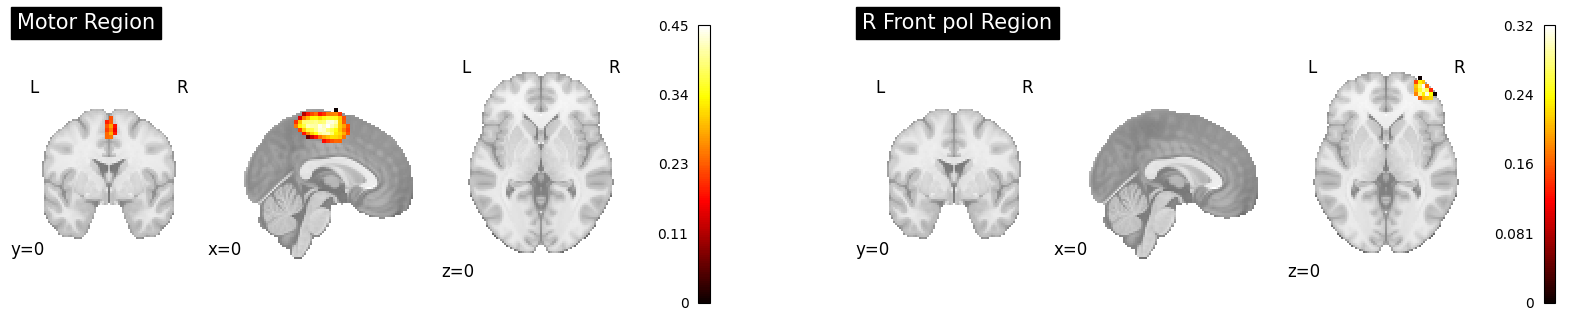

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

# plot atlas, one region
atlas_region1 = image.index_img(atlas_filename, 8)

plotting.plot_stat_map(
    atlas_region1, draw_cross=False, title=f"{labels[8]} Region", axes=axs[0], cut_coords = (0,0,0)
)

atlas_region2 = image.index_img(atlas_filename, 10)
plotting.plot_stat_map(
    atlas_region2, draw_cross=False, title=f"{labels[10]} Region", axes=axs[1], cut_coords = (0,0,0)
)

Visualize combination of multiple regions

C:\Users\Kickc\Downloads\Utilities\Python\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


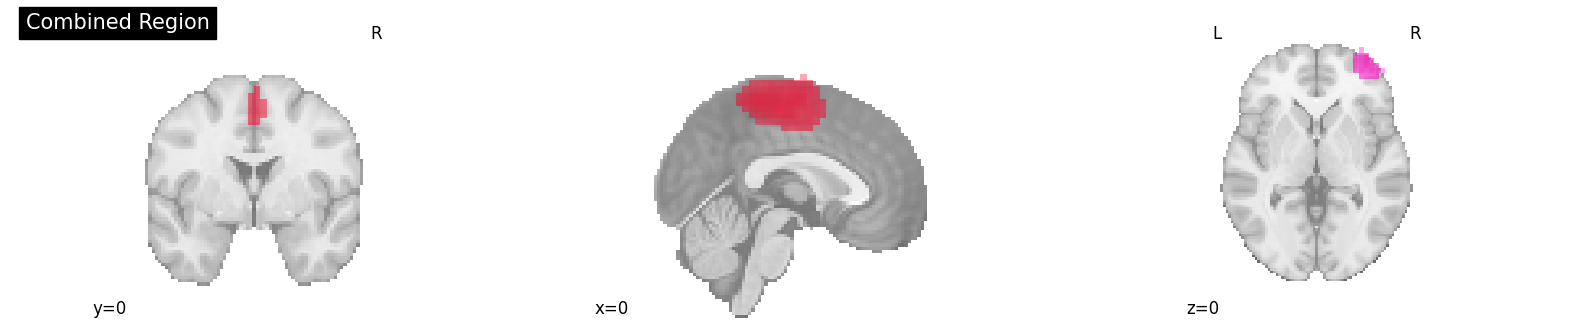

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(20, 4))

# plot atlas, one region
atlas_region = image.concat_imgs([atlas_region1, atlas_region2])

plotting.plot_prob_atlas(
    atlas_region, draw_cross=False, title=f"Combined Region", axes=axs, cut_coords = (0,0,0)
)


In [61]:
mean_img = image.mean_img(data.func[0])

In [62]:
mean_img.shape

(50, 59, 50)

In [63]:
vals = np.abs(first_comp) < .21
components_masked = first_comp.copy()
components_masked[vals] = 0
components_masked

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.21645665, -0.24498785,
       -0.25255953, -0.24864074,  0.        ,  0.        , -0.22316828,
        0.        ,  0.        ,  0.        ,  0.        , -0.23119894,
        0.        , -0.2761702 ,  0.        ,  0.        ])

In [64]:
def get_components_masked(eign_vectors, n):
    
    components_masks = []
    
    for i in range(n):
        
        comp = eign_vectors[:,i]
        
        vals = np.abs(comp) < .21
        comp[vals] = 0
        components_masks.append(comp)
        
    return components_masks

In [65]:
pca_component_img = masker.inverse_transform(get_components_masked(eivec, 3))
pca_component_img.shape

[NiftiMapsMasker.inverse_transform] computing image from signals


(40, 48, 35, 3)

In [66]:
image.index_img(pca_component_img, 0)

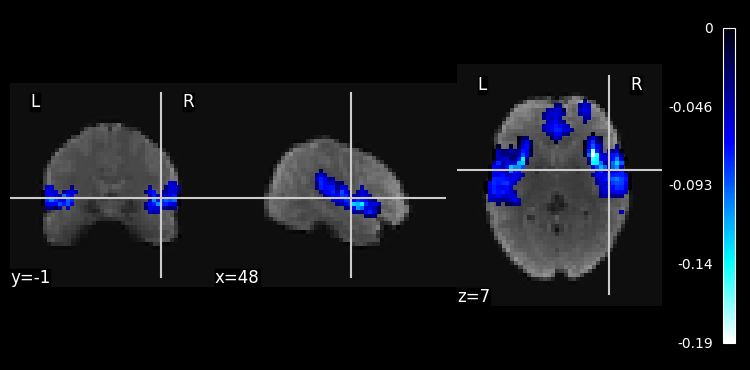

In [67]:
plotting.plot_stat_map(image.index_img(pca_component_img, 0), image.mean_img(data.func[0]))

C:\Users\Kickc\Downloads\Utilities\Python\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


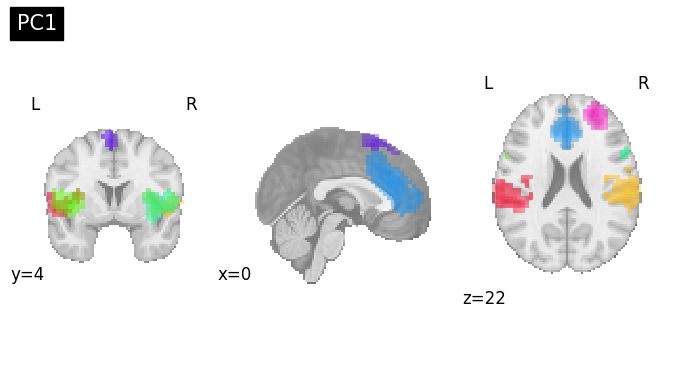

In [68]:
regions = stongest_regions(first_comp, val = False)

atlas_regions = image.concat_imgs([image.index_img(atlas_filename, labels.index(i)) for i in regions])

plotting.plot_prob_atlas(atlas_regions, draw_cross=False, title="PC1")

In [69]:
from nilearn.image import mean_img

def plot_more(num):
    lst = [first_comp,second_comp,third_comp]
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    regions = stongest_regions(lst[num-1], val = False)

    # plot atlas, regions
    atlas_regions = image.concat_imgs([image.index_img(atlas_filename, labels.index(i)) for i in regions])
#     data_mean = mean_img(data.func[0])

#     plotting.plot_stat_map(image.index_img(pca_component_img, num-1), mean_img(data.func[0]), display_mode="mosaic",cut_coords=3)
    
    plotting.plot_prob_atlas(
        atlas_regions, draw_cross=False, title="Component " + str(num), axes=axs, display_mode="mosaic",cut_coords=7
    )
    
#     return plotting.view_img_on_surf(mean_img(data.func[0]), threshold='90%', surf_mesh='fsaverage')

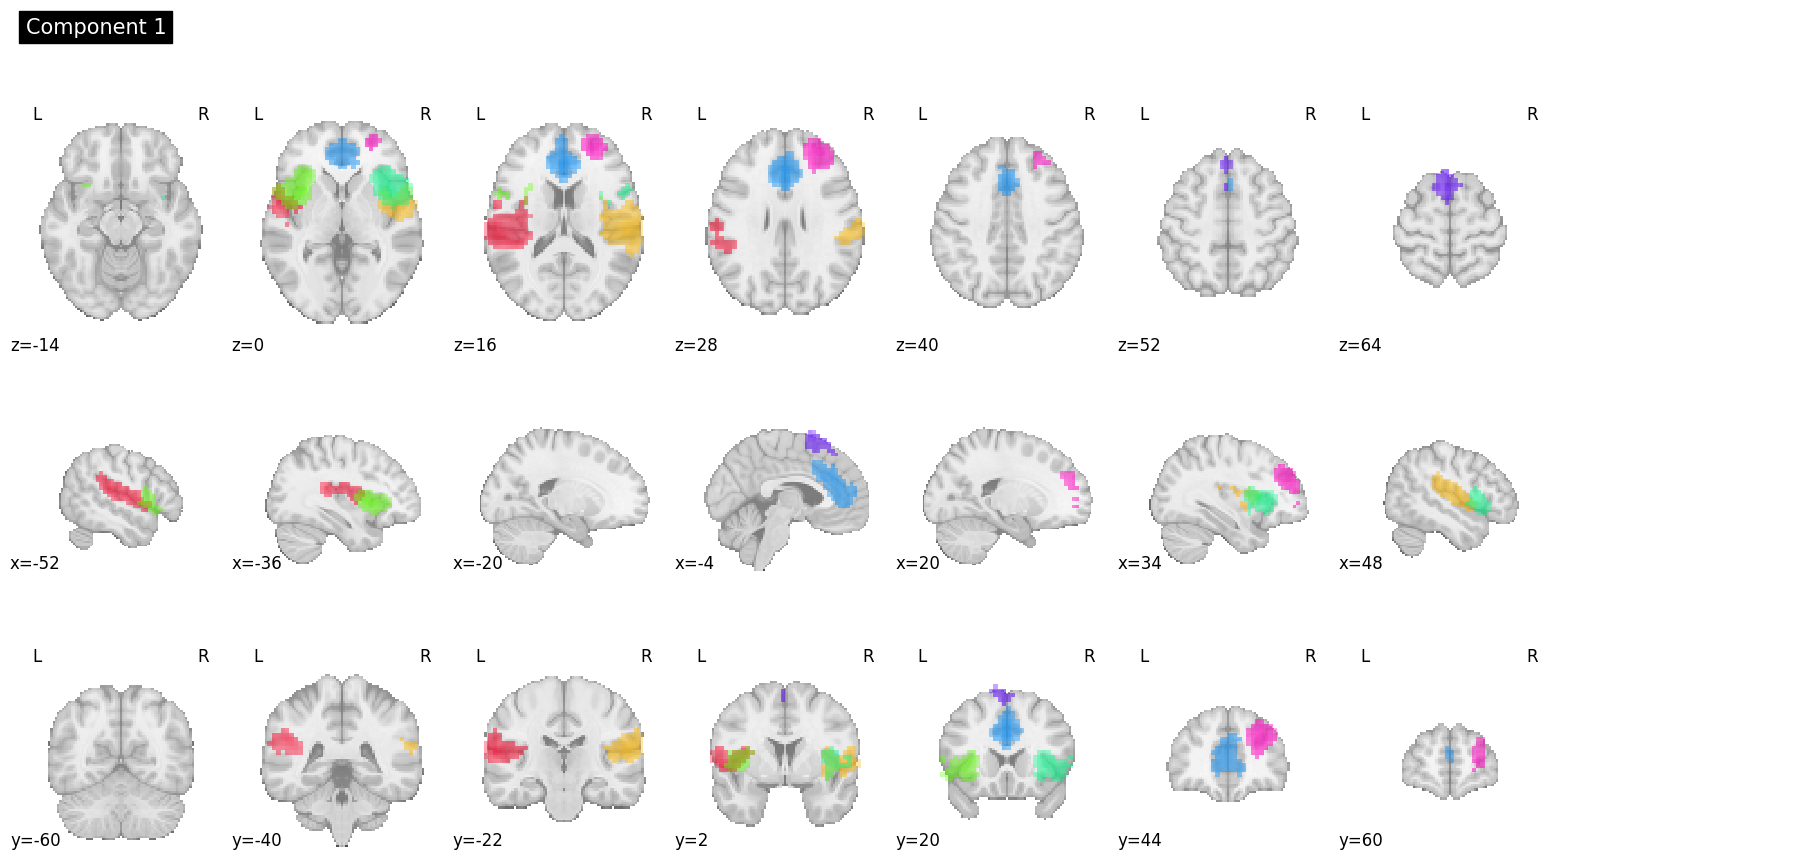

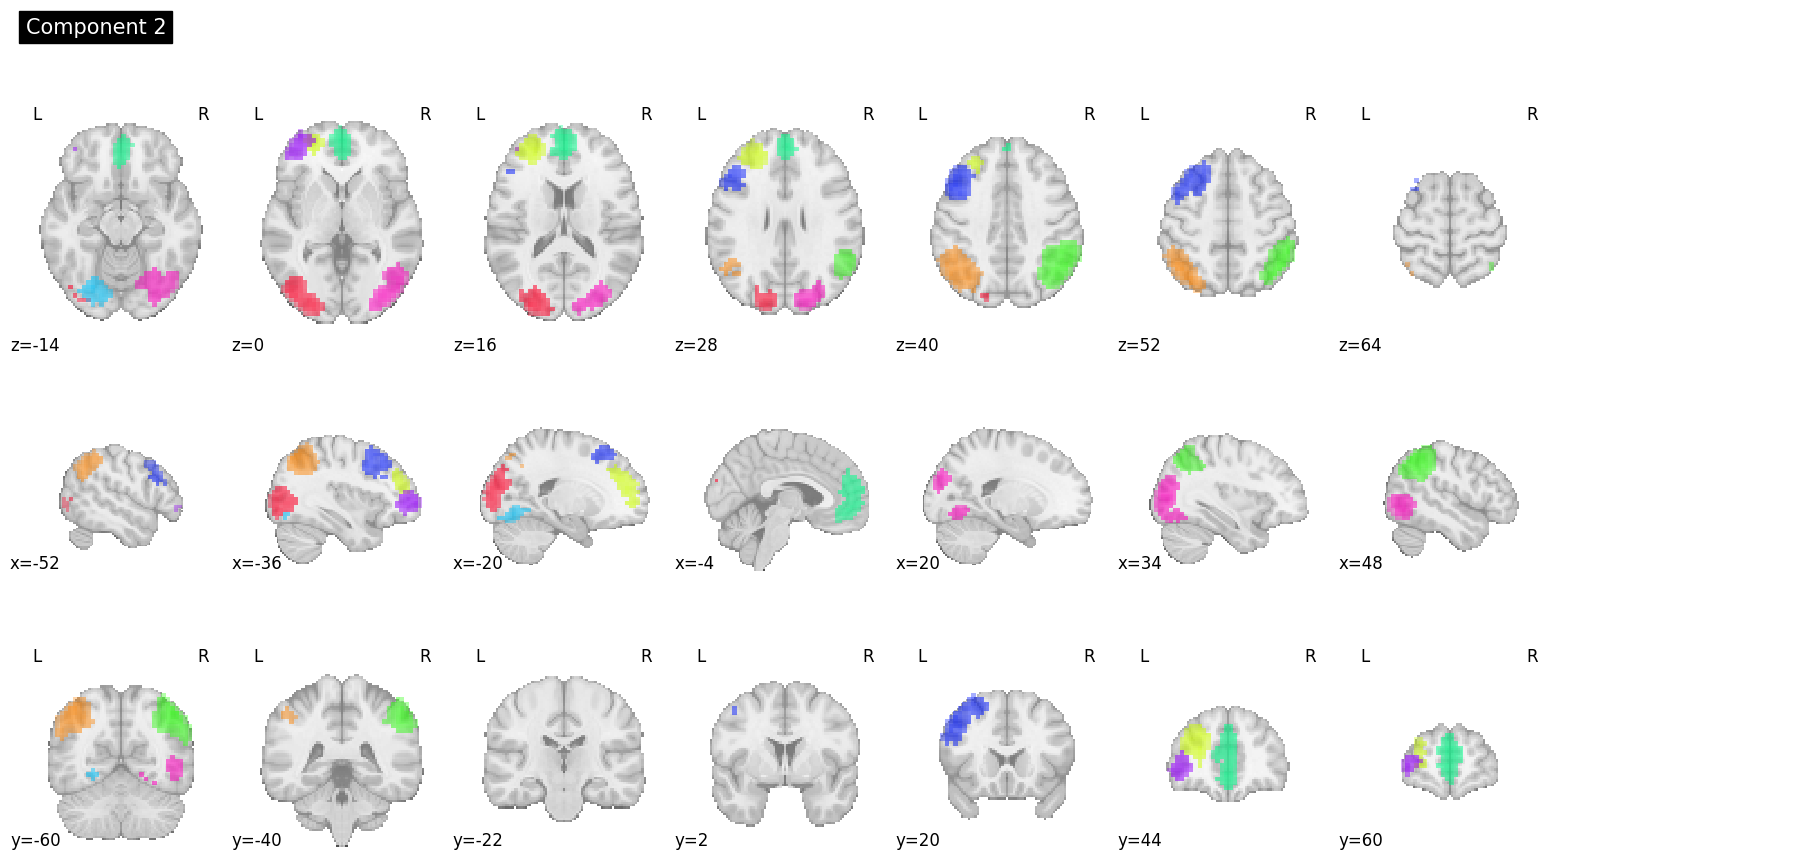

In [70]:
plot_more(1)
plot_more(2)

In [71]:
def plot_more2(num):
    lst = [first_comp,second_comp,third_comp]
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    regions = stongest_regions(lst[num-1], val = False)

    # plot atlas, regions
    atlas_regions = image.concat_imgs([image.index_img(atlas_filename, labels.index(i)) for i in regions])
    
    plotting.plot_prob_atlas(
        atlas_regions, draw_cross=False, title="Component " + str(num), axes=axs, cut_coords=(0,0,0)
    )

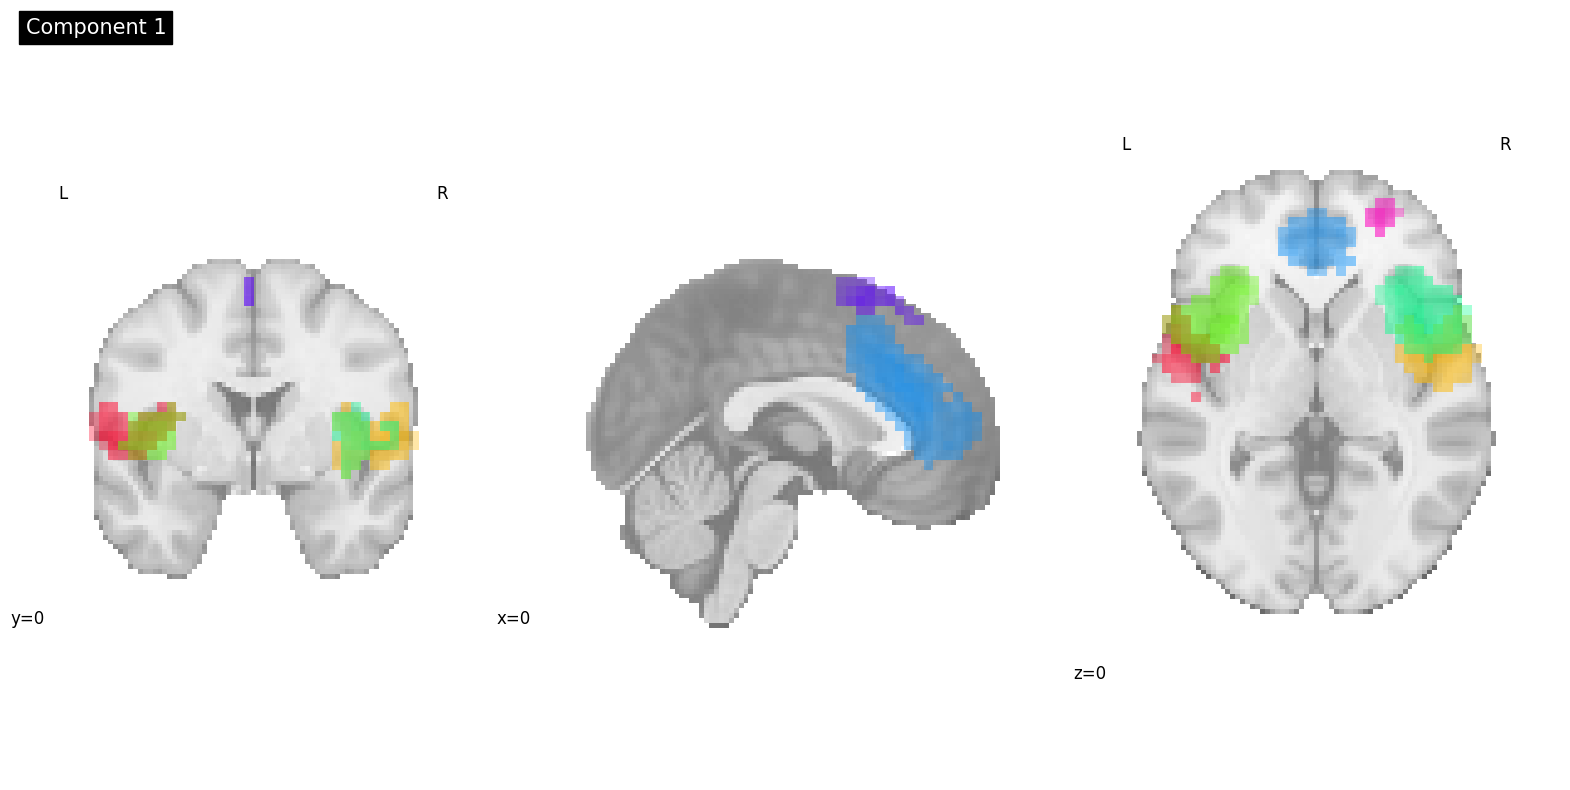

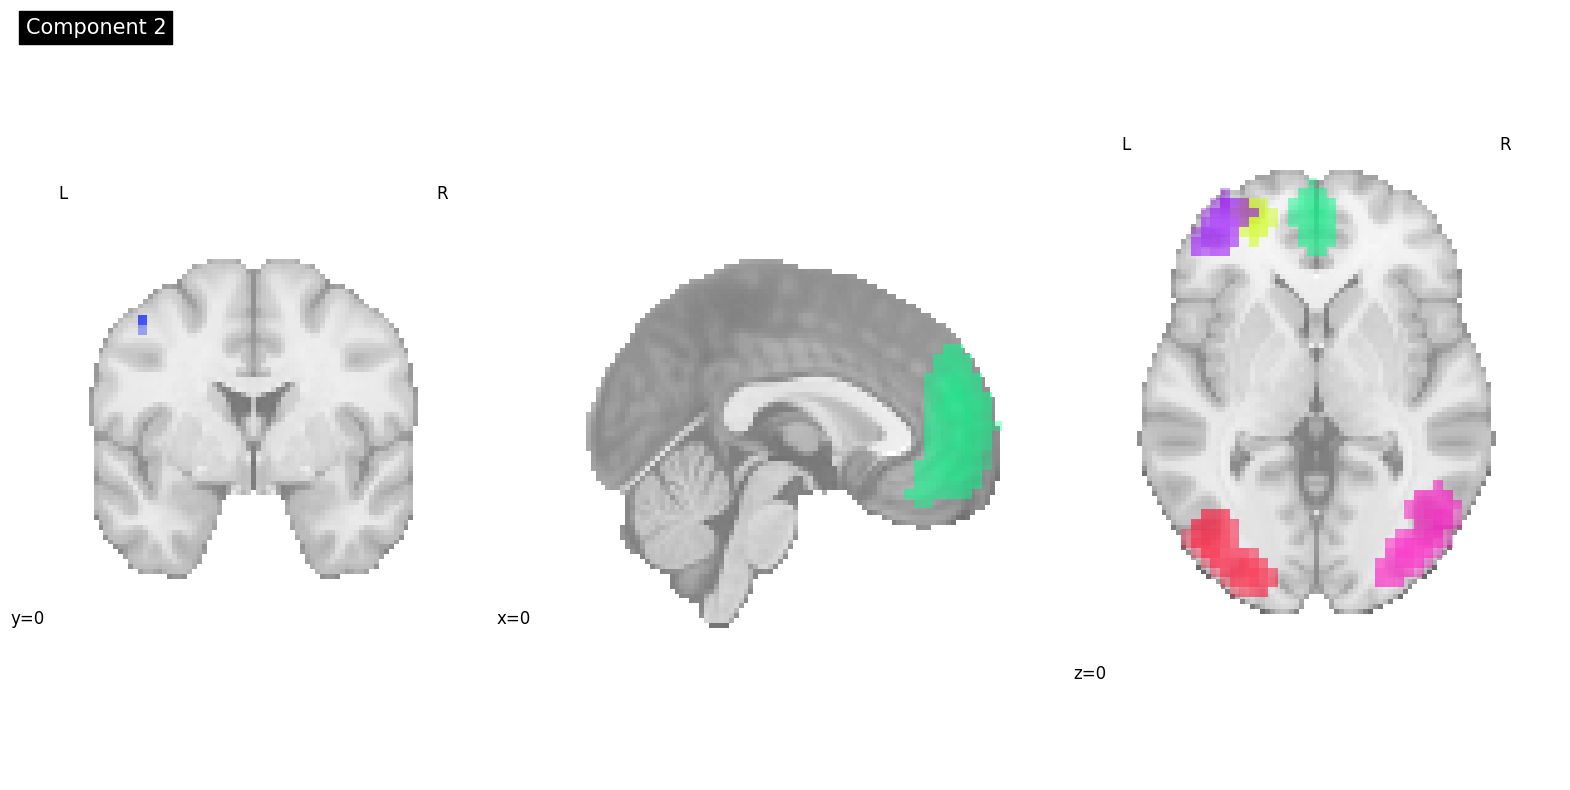

In [72]:
plot_more2(1)
plot_more2(2)

## ICA Using Time Series Data

In [73]:
from sklearn.decomposition import FastICA

I. Performing ICA

In [74]:
n_components = 3
ica = FastICA(n_components=n_components, random_state=42)
ica_components_masked = ica.fit_transform(time_series.T).T

C:\Users\Kickc\Downloads\Utilities\Python\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [75]:
ica_components_masked.shape

(3, 39)

II. Normalizing and mapping back to 3D representation

In [76]:
ica_components_masked -= ica_components_masked.mean(axis=0)
ica_components_masked /= ica_components_masked.std(axis=0)

import numpy as np

ica_components_masked[np.abs(ica_components_masked) < 1.2] = 0

ica_component_img = masker.inverse_transform(ica_components_masked)

[NiftiMapsMasker.inverse_transform] computing image from signals


In [77]:
def get_sr(num):
    r_set = stongest_regions(ica_components_masked[num], threshold = 0, val = False)
    lst = list(r_set)
    lst.sort()
    print(", ".join(lst))

In [78]:
test = stongest_regions(ica_components_masked[1], threshold = 0, val = True)
test

[('Front DMN', -1.414182953829772),
 ('L Ant IPS', 1.411598668167879),
 ('L DMN', -1.4071403846080472),
 ('Med DMN', -1.4067145859784391),
 ('R Post Temp', -1.4032058880080183),
 ('L TPJ', -1.4027056829253115),
 ('L Par', -1.3879673771580026),
 ('R Pars Op', 1.355870963412333),
 ('L Front pol', -1.3253727297511162),
 ('R TPJ', 1.3219387881749922),
 ('R Aud', 1.3186714144478484),
 ('R Ant IPS', 1.317047175505293),
 ('L DLPFC', -1.303276089921112),
 ('Cereb', 1.302526208851939),
 ('R DMN', -1.2877731419617016),
 ('L Aud', 1.2803441769503479)]

In [79]:
sorted_by_second = sorted(test, key=lambda tup: np.abs(tup[1]),reverse=True)
sorted_by_second

[('Front DMN', -1.414182953829772),
 ('L Ant IPS', 1.411598668167879),
 ('L DMN', -1.4071403846080472),
 ('Med DMN', -1.4067145859784391),
 ('R Post Temp', -1.4032058880080183),
 ('L TPJ', -1.4027056829253115),
 ('L Par', -1.3879673771580026),
 ('R Pars Op', 1.355870963412333),
 ('L Front pol', -1.3253727297511162),
 ('R TPJ', 1.3219387881749922),
 ('R Aud', 1.3186714144478484),
 ('R Ant IPS', 1.317047175505293),
 ('L DLPFC', -1.303276089921112),
 ('Cereb', 1.302526208851939),
 ('R DMN', -1.2877731419617016),
 ('L Aud', 1.2803441769503479)]

In [80]:
get_sr(0)

Cing, Dors PCC, L Ins, L STS, Motor, R A Ins, R IPS, R Ins, R STS


C:\Users\Kickc\Downloads\Utilities\Python\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


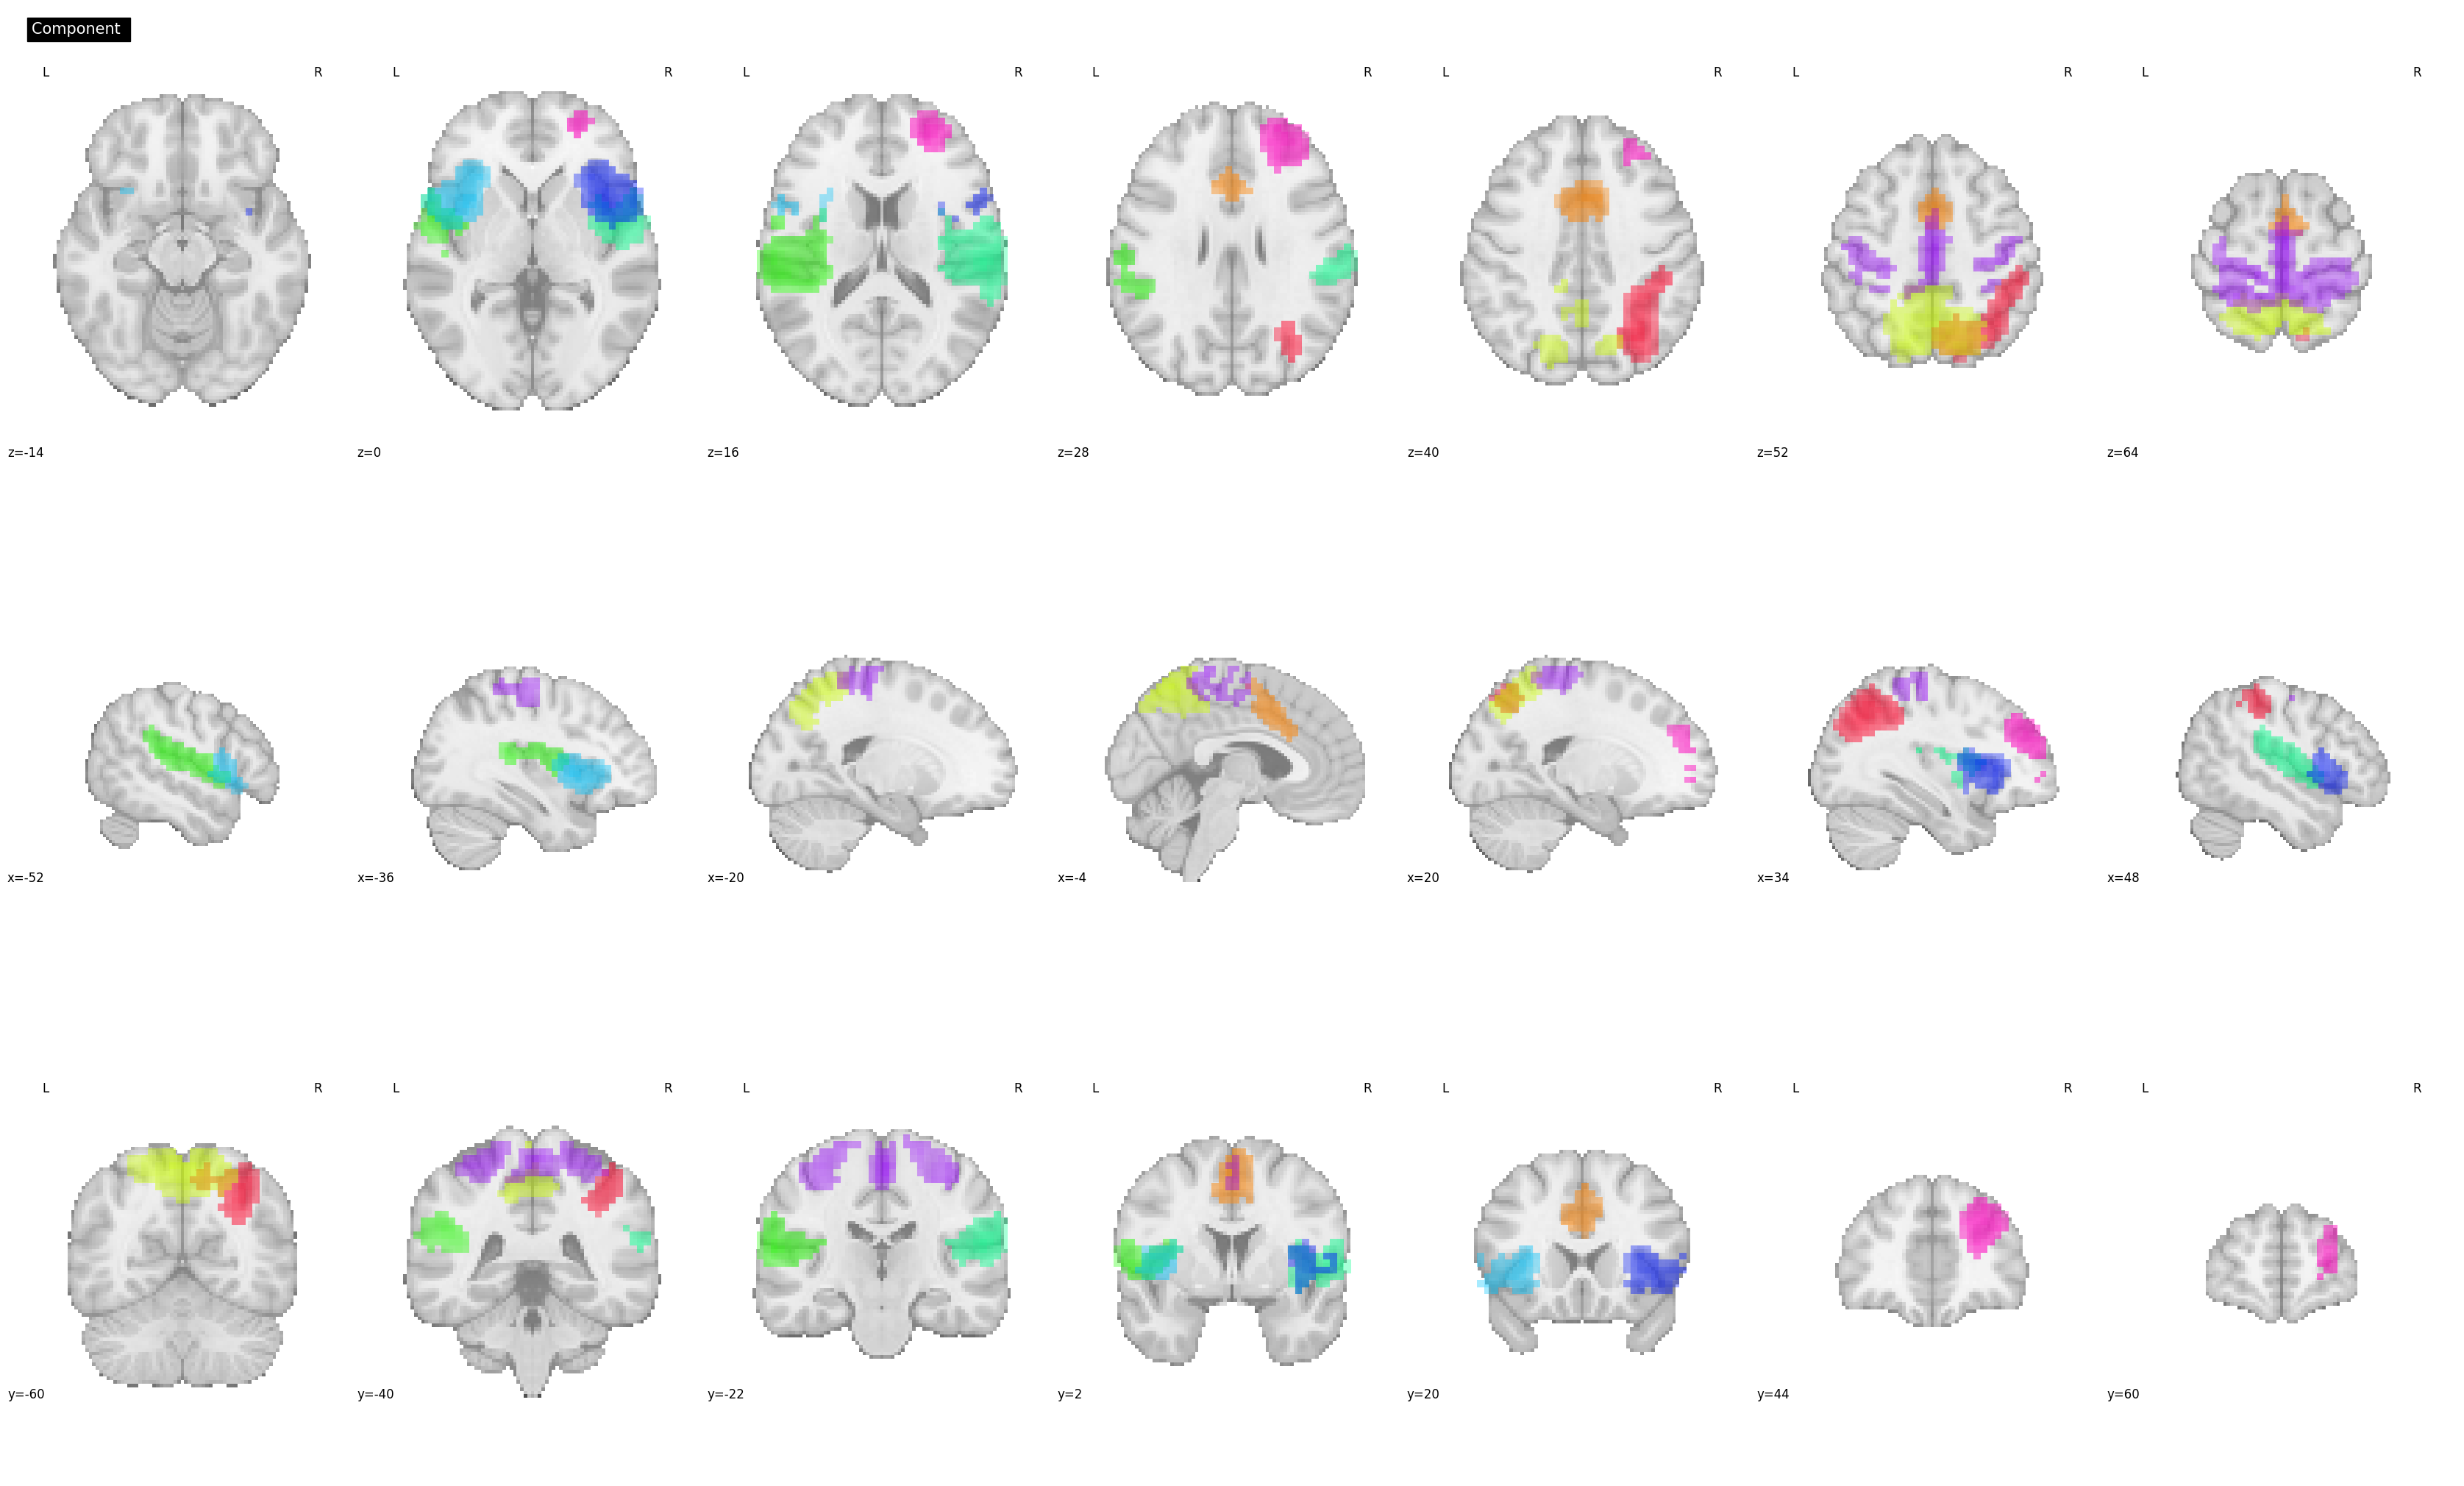

In [81]:
regions = stongest_regions(ica_components_masked[0], threshold = 0, val = False)
atlas_regions = image.concat_imgs([image.index_img(atlas_filename, labels.index(i)) for i in regions])

plotting.plot_prob_atlas(
    atlas_regions, draw_cross=False, title="Component ", display_mode="mosaic",cut_coords=7
)

In [82]:
ica_components_masked[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.368801  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.38315019,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -1.40843787,
       -1.41410813, -1.38951775,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.4015502 , -1.41051212,
       -1.37268197, -1.39931245,  0.        ,  0.        ])

In [83]:
np.mean(np.abs(ica_components_masked))

0.454009262048826

In [84]:
ica_component_img.shape

(40, 48, 35, 3)

III. Visualizing Results

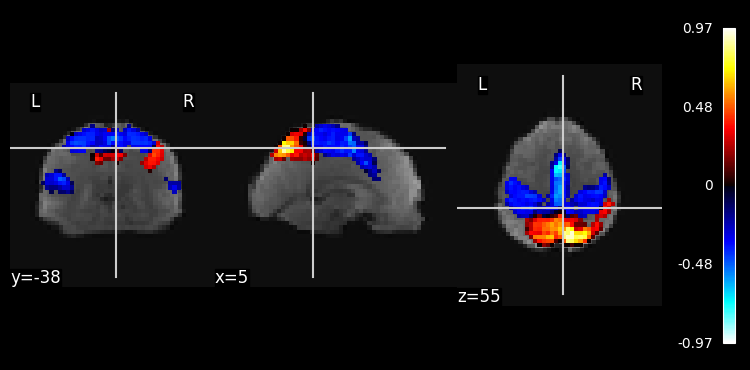

In [85]:
plotting.plot_stat_map(image.index_img(ica_component_img, 0), image.mean_img(data.func[0]))

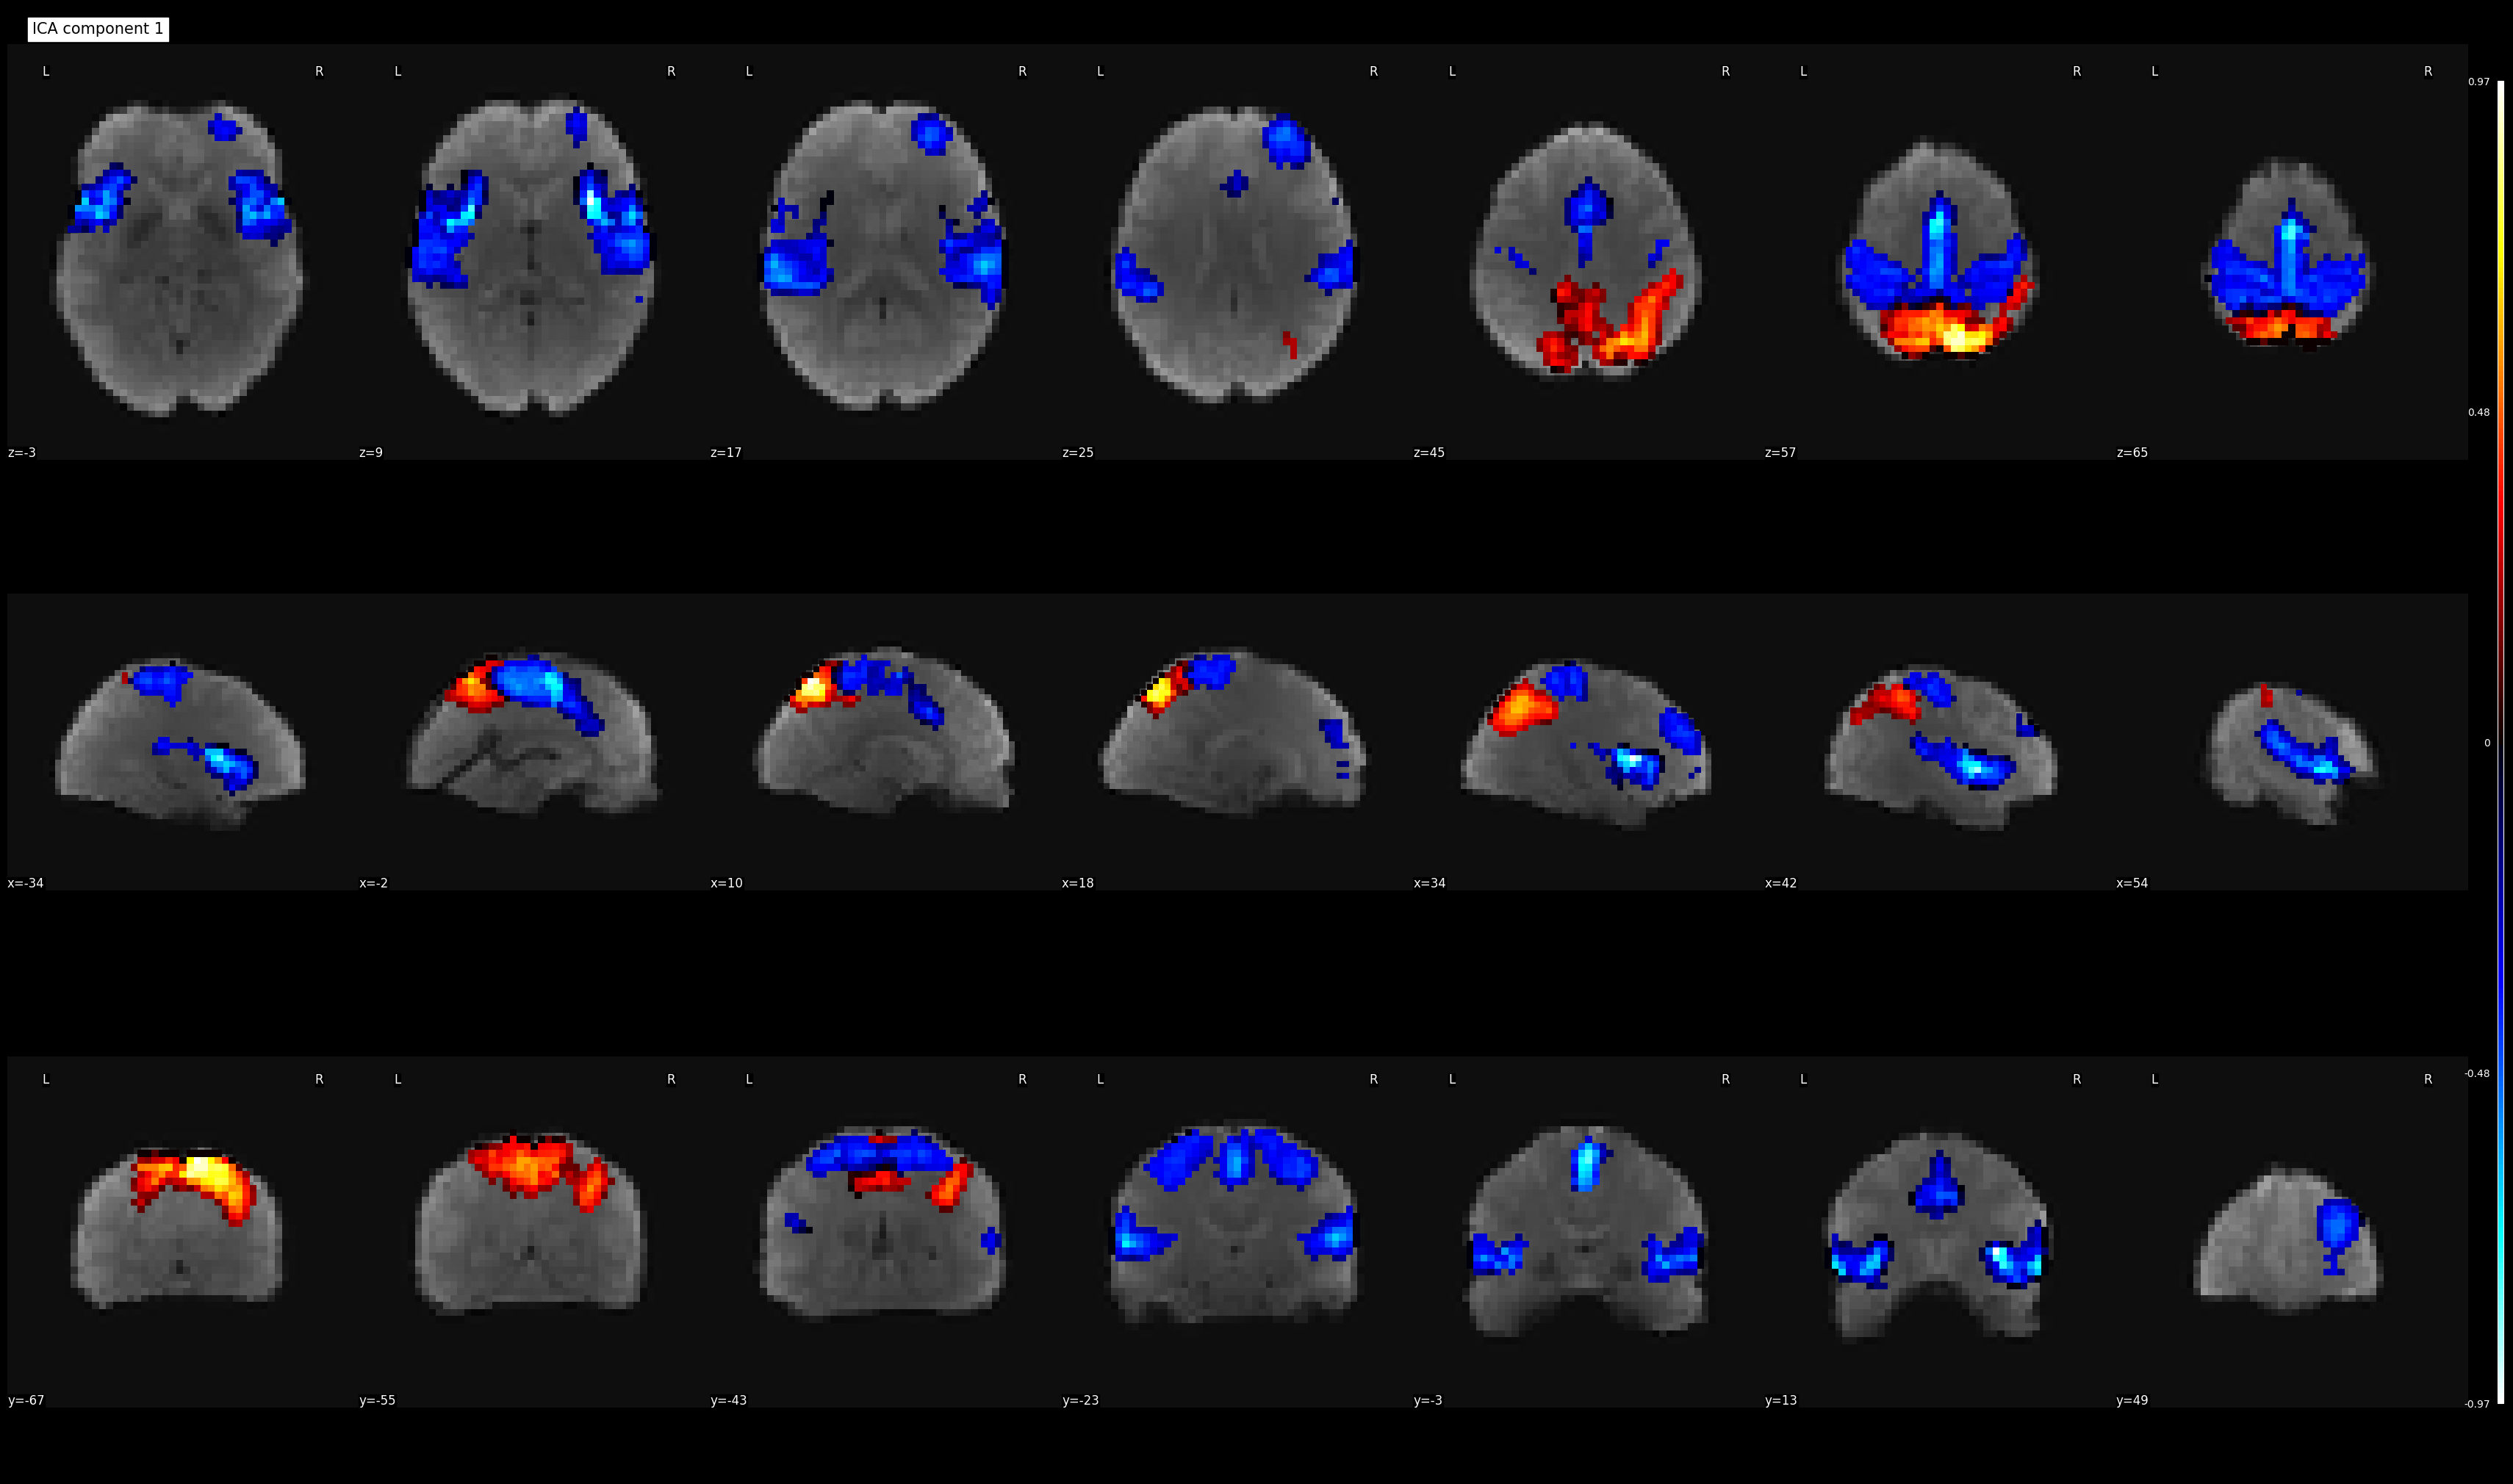

In [86]:
plotting.plot_stat_map(
    image.index_img(ica_component_img, 0), image.mean_img(data.func[0]), draw_cross=False, 
    title=f"ICA component {1}", display_mode="mosaic"
)

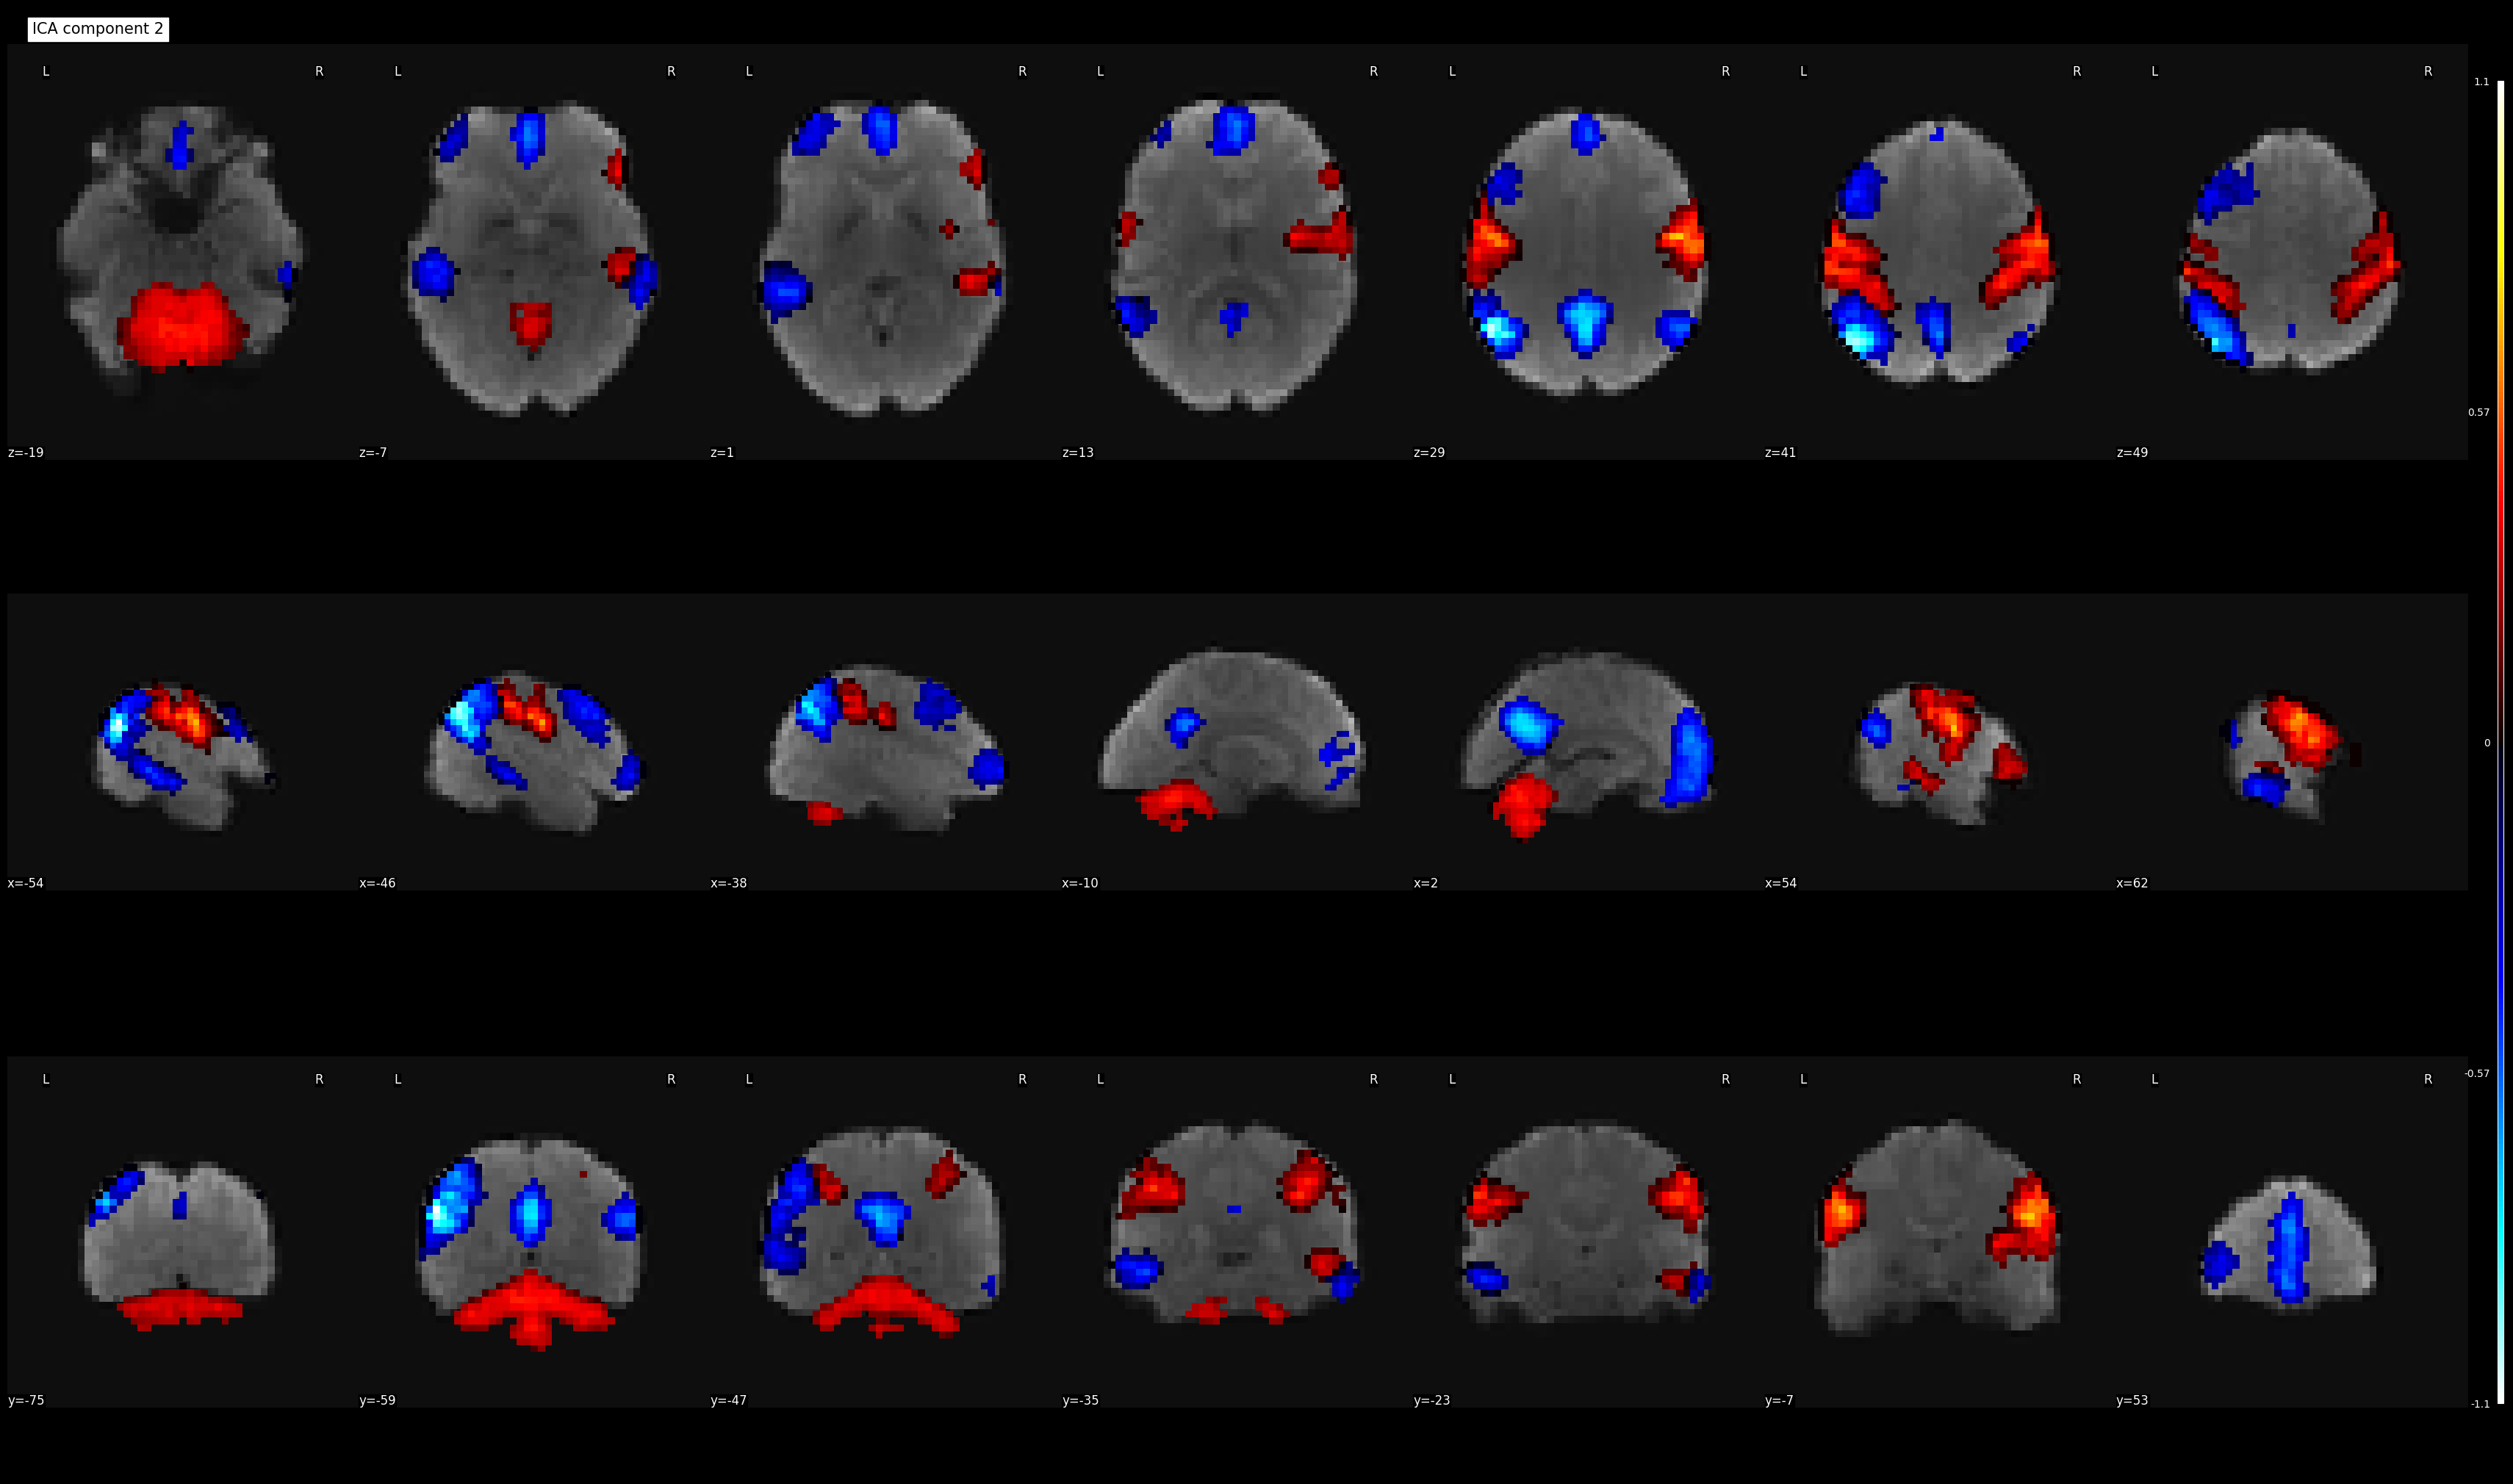

In [87]:
plotting.plot_stat_map(
    image.index_img(ica_component_img, 1), image.mean_img(data.func[0]), draw_cross=False, 
    title=f"ICA component {2}", display_mode="mosaic"
)

C:\Users\Kickc\Downloads\Utilities\Python\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


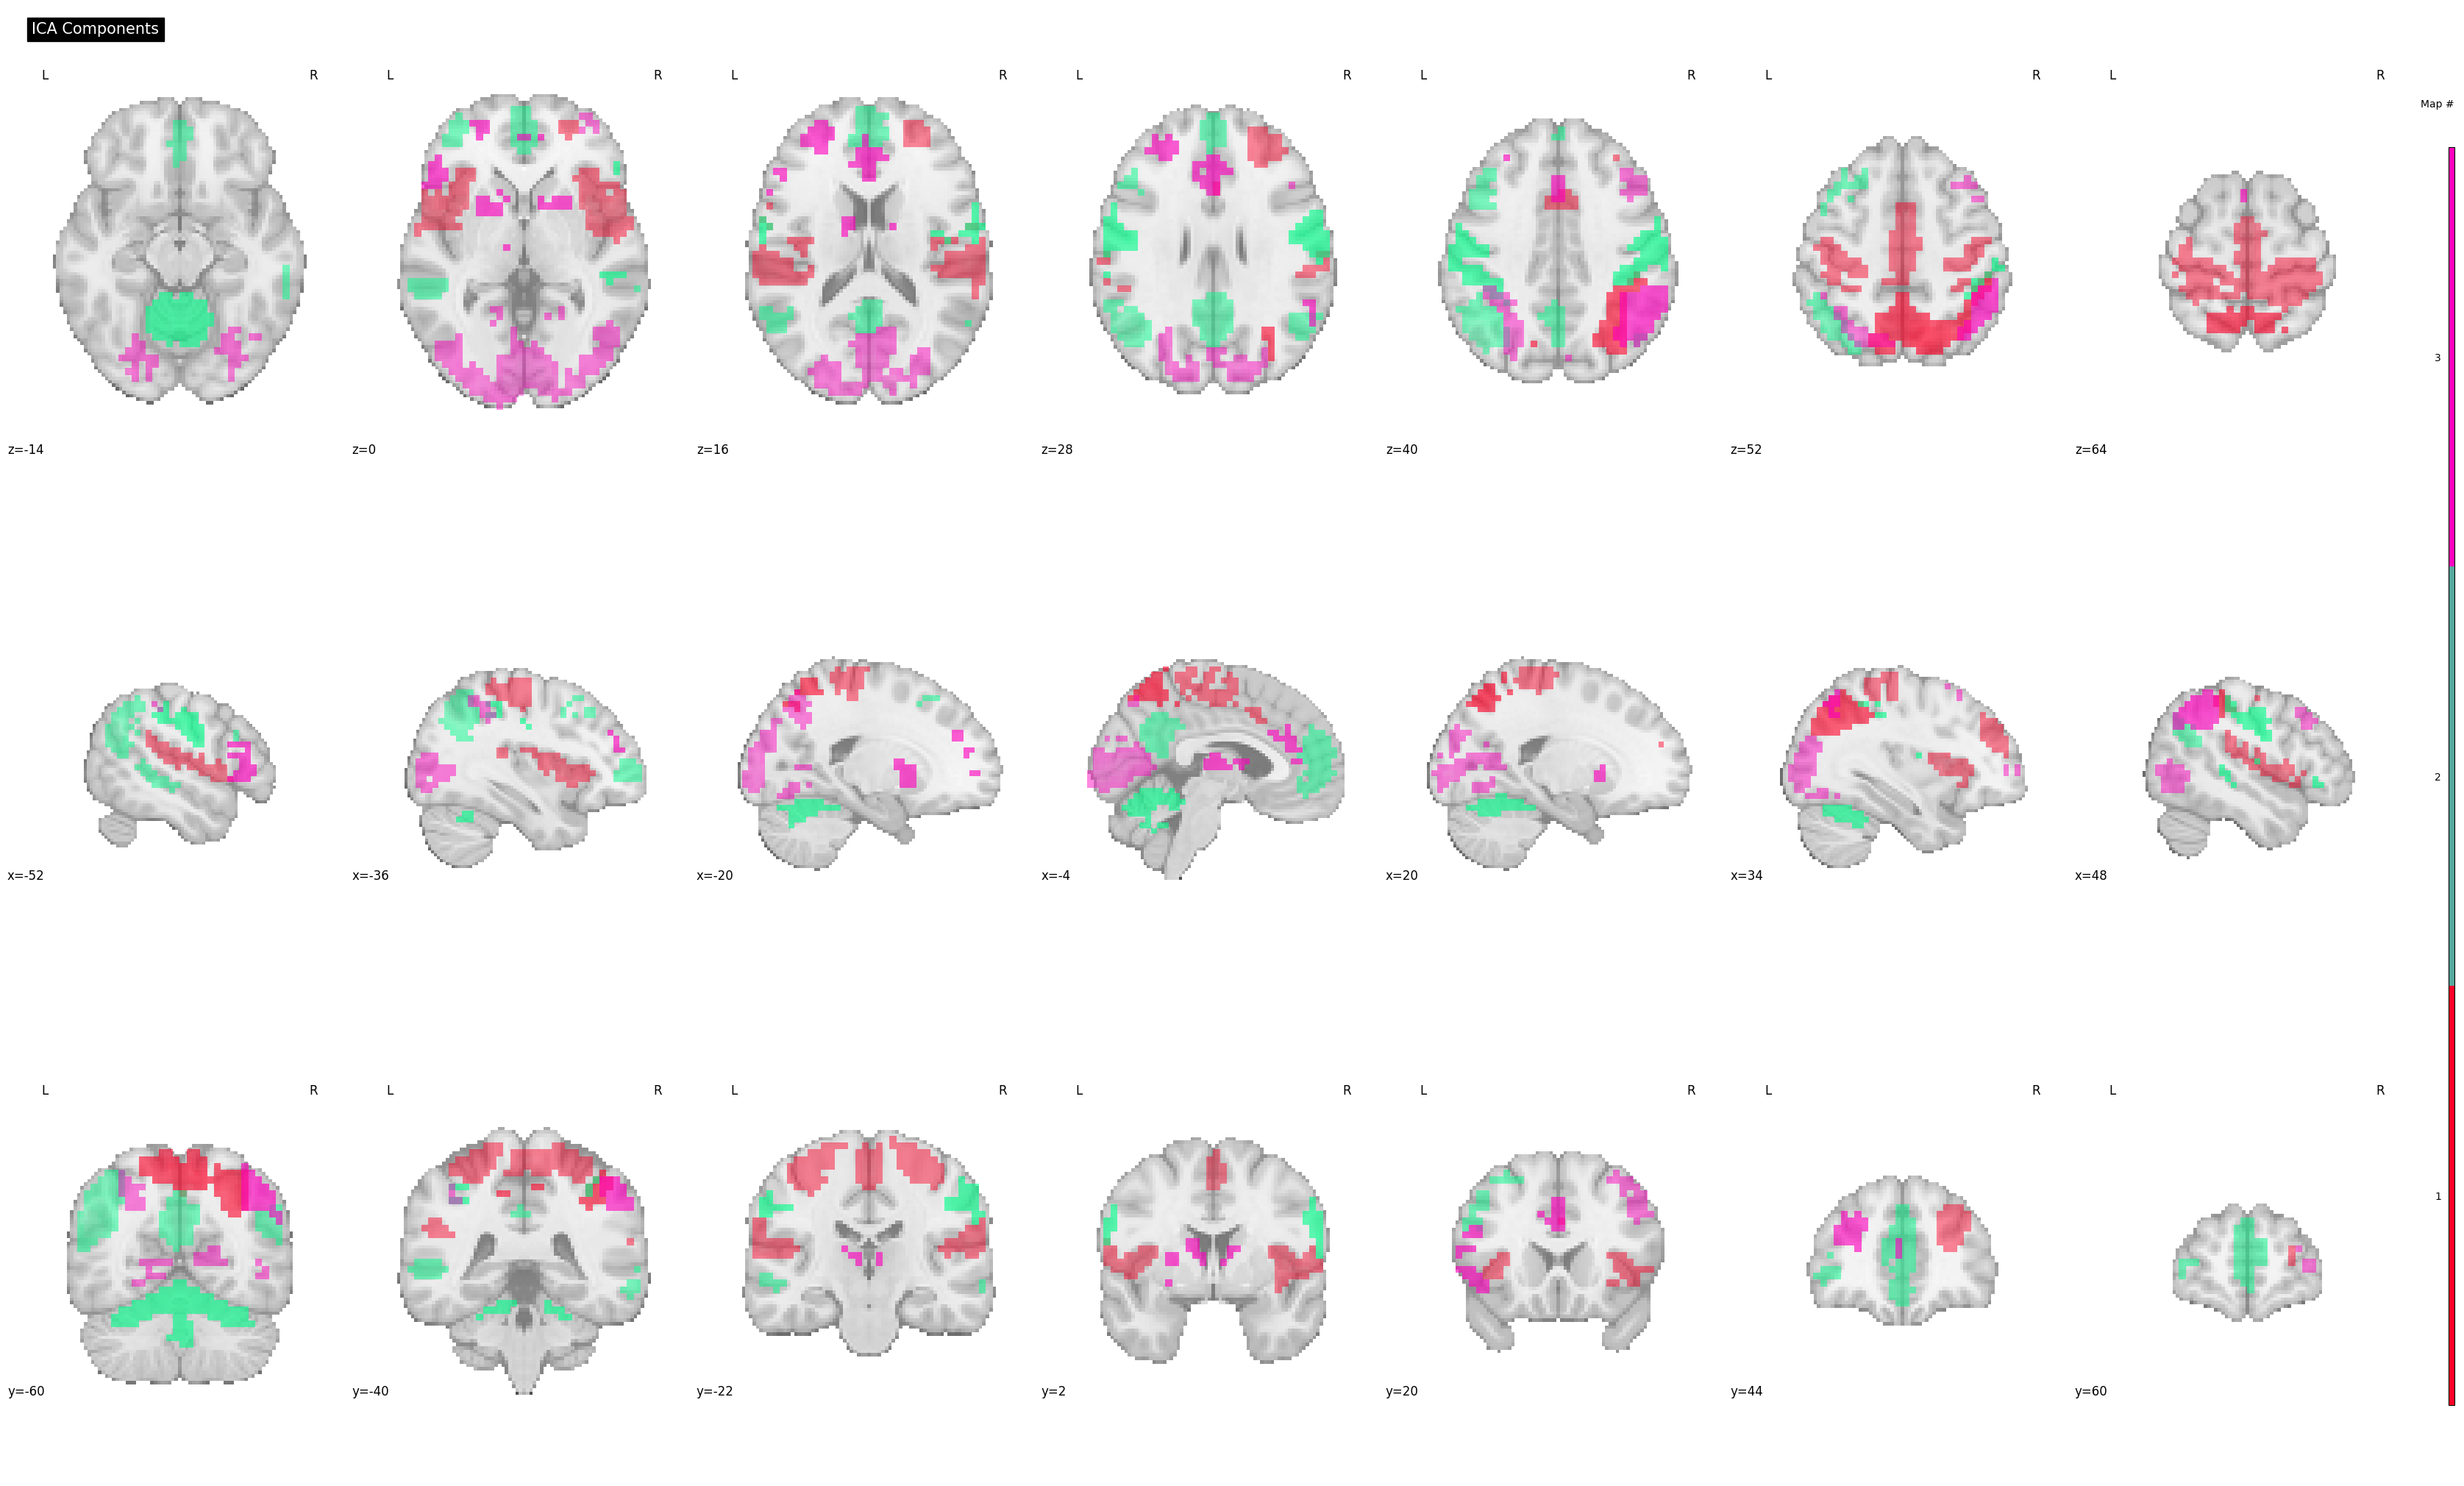

In [88]:
plotting.plot_prob_atlas(
        ica_component_img, draw_cross=False, title="ICA Components", display_mode="mosaic",colorbar=True
    )

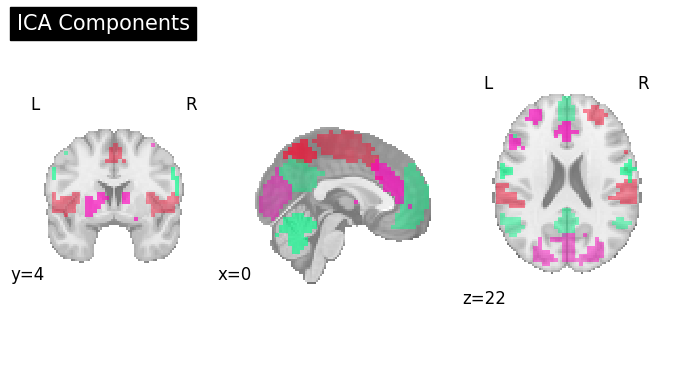

In [89]:
plotting.plot_prob_atlas(
        ica_component_img, draw_cross=False, title="ICA Components"
    )

**Compare ICA and PCA**

In [90]:
def plot_vs(comp):
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))

    component = comp - 1

    plotting.plot_stat_map(
        image.index_img(pca_component_img, component), image.mean_img(data.func[0]), draw_cross=False, 
        title=f"PCA component {component + 1}", axes=axs[0],cut_coords=(0,0,0)
    )

    plotting.plot_stat_map(
        image.index_img(ica_component_img, component), image.mean_img(data.func[0]), draw_cross=False, 
        title=f"ICA component {component + 1}", axes=axs[1],cut_coords=(0,0,0)
    )

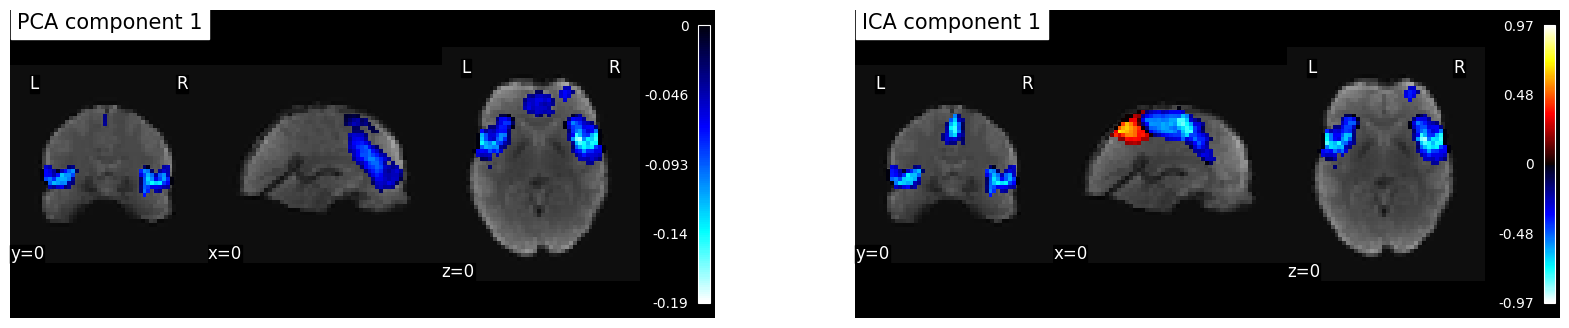

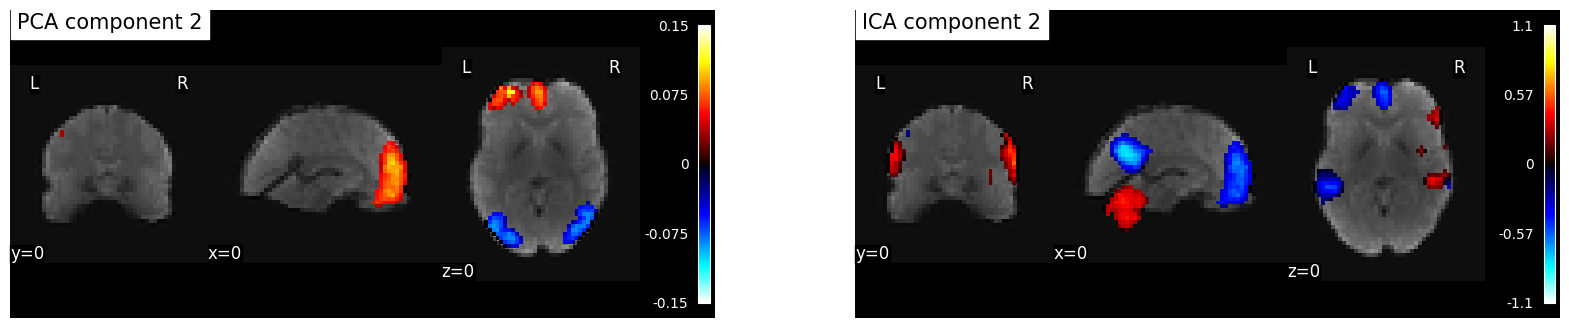

In [91]:
plot_vs(1)
plot_vs(2)